In [3]:
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir la ruta de la carpeta de datos
WORKSPACE = os.path.abspath(os.path.join(os.getcwd(), '../../'))
DATA_FOLDER = os.path.join(WORKSPACE, 'data')

print("Workspace:", WORKSPACE)
print("Data folder:", DATA_FOLDER)
# Ajustar directorios de trabajo

def resumen_general(df):
    print("Número de documentos en el dataset:")
    print(len(df))

    print("\nTipos de datos por columna:")
    print(df.dtypes)

    file_path = os.path.join(DATA_FOLDER, 'data.csv')
    file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"\nTamaño del dataset: {file_size_mb:.2f} MB")

def datos_faltante(df):
    print("Visualización de datos faltantes:")
    msno.matrix(df)
    plt.show()
    
    missing_percentage = df.isnull().mean() * 100

    # Mostrar el porcentaje de valores faltantes de cada columna
    print("Porcentaje de datos faltantes por columna:")
    print(missing_percentage)
    
    # Calcular la cantidad de datos faltantes por columna
    missing_count = df.isnull().sum()

    # Mostrar la cantidad de datos faltantes por columna
    print("Cantidad de datos faltantes por columna:")
    print(missing_count)

def distribucion_variable_objetivo(df):
    # Guardar la gráfica como imagen
    plt.figure(figsize=(10, 6))
    sns.histplot(df['PTPM_CON'], bins=30, kde=True, color='blue')

    # Títulos y etiquetas
    plt.title('Distribución de la variable PTPM_CON', fontsize=16)
    plt.xlabel('PTPM_CON', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)

    # Guardar la gráfica como PNG
    plt.savefig('PTPM_CON_Distribucion.png', dpi=300, bbox_inches='tight')

    # Mostrar la gráfica (opcional)
    plt.show()

def estadisticas_descriptivas(df):
    # Calcular estadísticas descriptivas para las variables seleccionadas
    variables = [
        'HR_CAL_MN_D', 'HR_CAL_MX_D', 'NV_MEDIA_D',
        'NV_MN_D', 'NV_MX_D', 'TMN_CON', 'TMX_CON'
    ]

    # Obtener estadísticas descriptivas
    descriptive_stats = df[variables].describe()

    # Mostrar las estadísticas descriptivas
    print(descriptive_stats)
    
    print(df['PTPM_CON'].describe())

def distribucion_variables(df):
    # Filtrar el DataFrame eliminando las columnas DOY, MOY, WOY, Fecha y CodigoEstacion
    df_analisis = df.drop(columns=['DOY', 'MOY', 'WOY', 'Fecha', 'CodigoEstacion'], errors='ignore')

    # Variable objetivo
    target_column = 'PTPM_CON'

    if target_column in df_analisis.columns:
        print(f"La variable objetivo '{target_column}' está presente en el dataset.")
        print(f"La variable '{target_column}' es continua.")

        # Graficar la distribución de la variable objetivo
        sns.histplot(df_analisis[target_column], kde=True)
        plt.title(f"Distribución de la variable '{target_column}'")
        plt.show()

    # Identificar las variables adicionales
    additional_columns = [col for col in df_analisis.columns if col != target_column]

    if additional_columns:
        print("\nEl conjunto de datos cuenta con las siguientes variables adicionales:")
        print(additional_columns)

        # Análisis descriptivo de las variables adicionales
        print("\nAnálisis descriptivo de las variables adicionales:")
        print(df_analisis[additional_columns].describe())

        # Graficar la distribución de las variables adicionales
        for col in additional_columns:
            if df_analisis[col].dtype == 'object':
                sns.countplot(x=df_analisis[col])
            else:
                sns.histplot(df_analisis[col], kde=True)
            plt.title(f"Distribución de la variable '{col}'")
            plt.show()


Workspace: /home/jovyan/work/mlds6
Data folder: /home/jovyan/work/mlds6/data


Número de documentos en el dataset:
17990978

Tipos de datos por columna:
CodigoEstacion      int64
Fecha              object
HR_CAL_MN_D       float64
HR_CAL_MX_D       float64
NV_MEDIA_D        float64
NV_MN_D           float64
NV_MX_D           float64
PTPM_CON          float64
TMN_CON           float64
TMX_CON           float64
dtype: object

Tamaño del dataset: 594.41 MB
Visualización de datos faltantes:


/usr/local/lib/python3.11/dist-packages/matplotlib/image.py:181: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


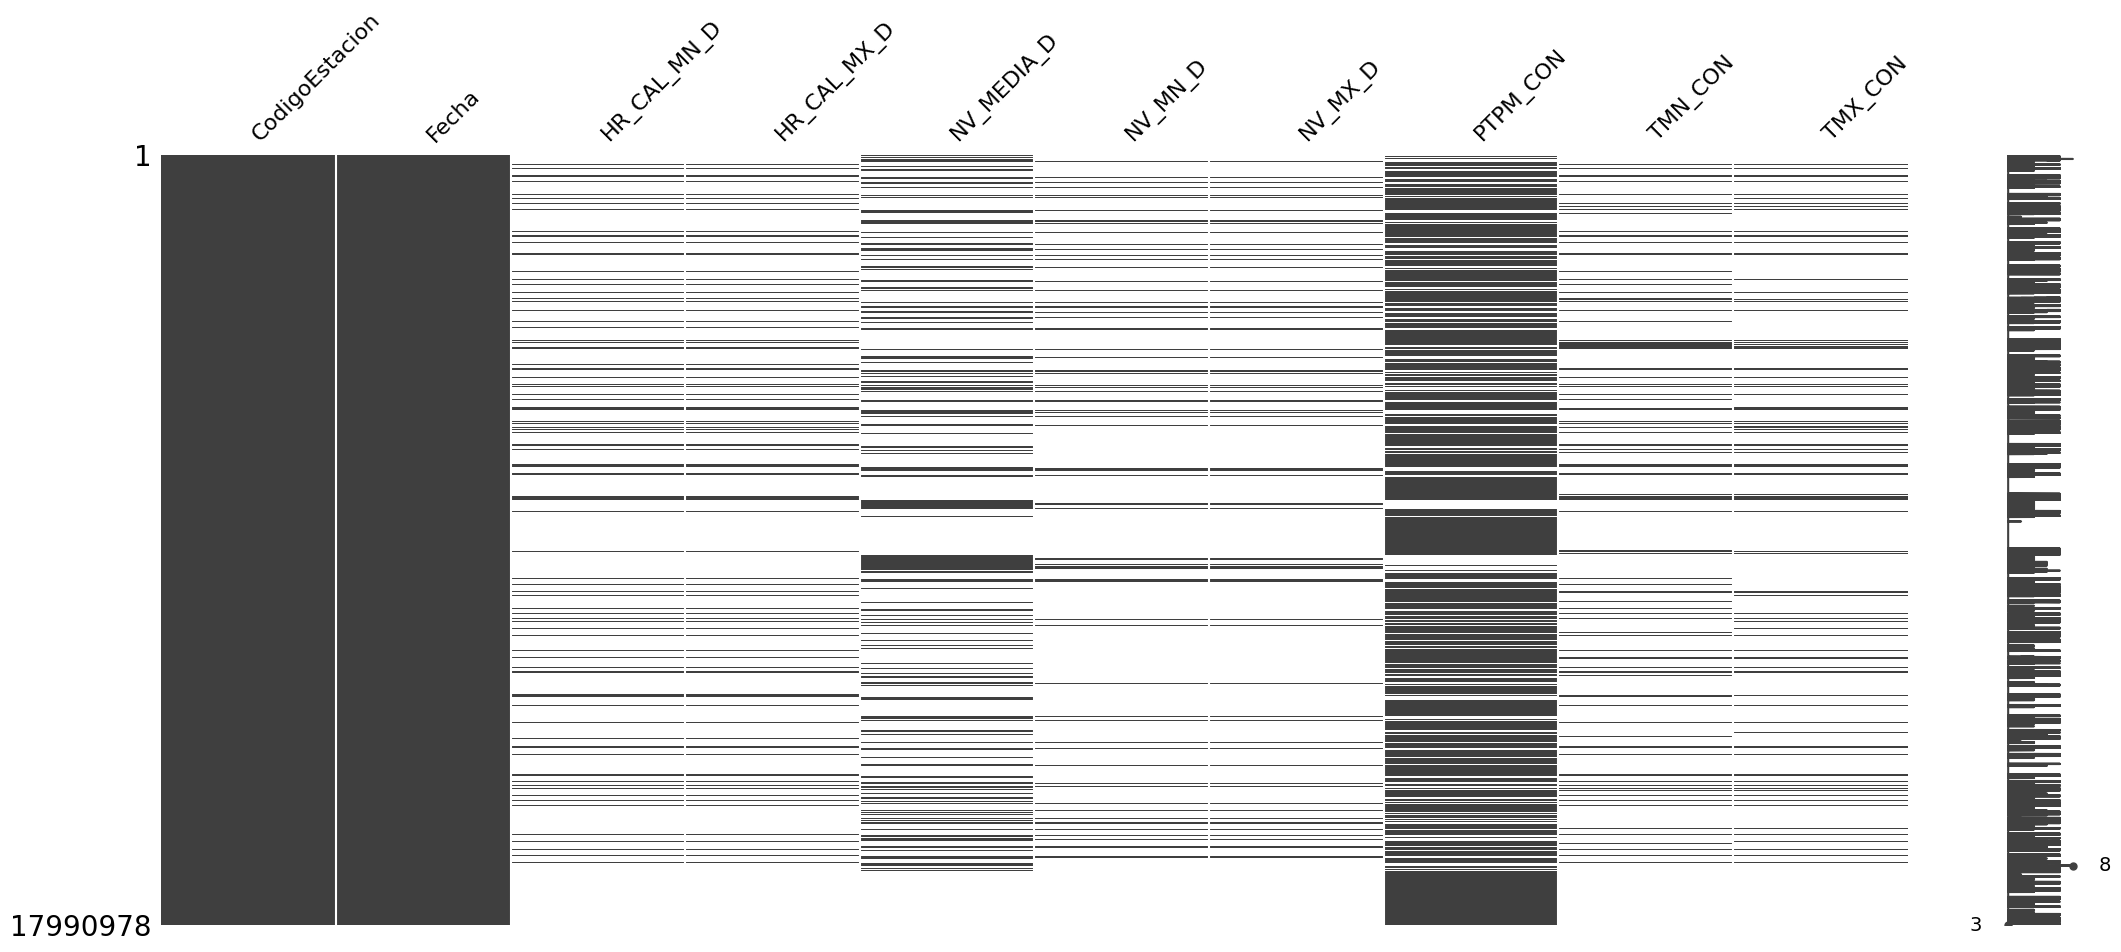

Porcentaje de datos faltantes por columna:
CodigoEstacion     0.000000
Fecha              0.000000
HR_CAL_MN_D       87.116581
HR_CAL_MX_D       87.116570
NV_MEDIA_D        73.413113
NV_MN_D           91.002524
NV_MX_D           90.976961
PTPM_CON          25.423187
TMN_CON           85.450096
TMX_CON           86.383303
dtype: float64
Cantidad de datos faltantes por columna:
CodigoEstacion           0
Fecha                    0
HR_CAL_MN_D       15673125
HR_CAL_MX_D       15673123
NV_MEDIA_D        13207737
NV_MN_D           16372244
NV_MX_D           16367645
PTPM_CON           4573880
TMN_CON           15373308
TMX_CON           15541201
dtype: int64


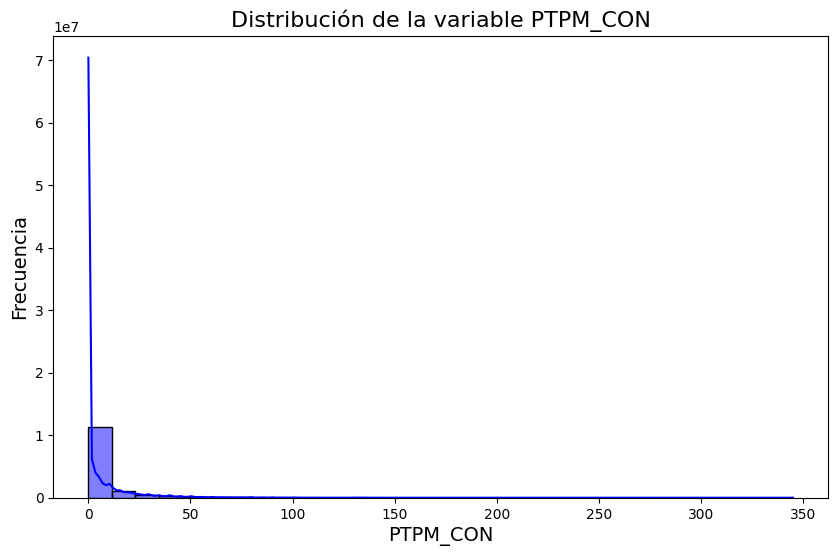

        HR_CAL_MN_D   HR_CAL_MX_D    NV_MEDIA_D       NV_MN_D       NV_MX_D  \
count  2.317853e+06  2.317855e+06  4.783241e+06  1.618734e+06  1.623333e+06   
mean   6.662279e+01  9.150517e+01  2.689685e+02  2.511578e+02  2.718562e+02   
std    1.421411e+01  7.319152e+00  3.669186e+02  2.389704e+02  2.579747e+02   
min   -3.900000e+01  2.300000e+01 -6.061000e+02 -7.460000e+02 -5.970000e+02   
25%    5.700000e+01  8.900000e+01  9.600000e+01  9.000000e+01  1.025000e+02   
50%    6.700000e+01  9.300000e+01  1.800000e+02  1.680000e+02  1.900000e+02   
75%    7.700000e+01  9.700000e+01  3.420000e+02  3.270000e+02  3.650000e+02   
max    1.130000e+02  2.390000e+02  2.118060e+04  1.885500e+03  4.974200e+04   

            TMN_CON       TMX_CON  
count  2.617670e+06  2.449777e+06  
mean   1.720513e+01  2.733514e+01  
std    6.136551e+00  6.073008e+00  
min   -9.800000e+00  0.000000e+00  
25%    1.280000e+01  2.260000e+01  
50%    1.840000e+01  2.860000e+01  
75%    2.240000e+01  3.220000e+01  


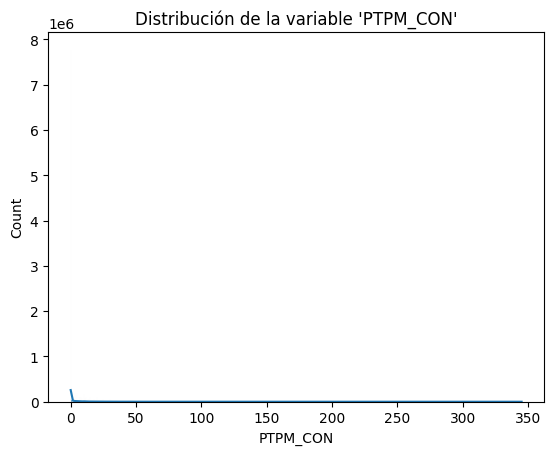


El conjunto de datos cuenta con las siguientes variables adicionales:
['HR_CAL_MN_D', 'HR_CAL_MX_D', 'NV_MEDIA_D', 'NV_MN_D', 'NV_MX_D', 'TMN_CON', 'TMX_CON']

Análisis descriptivo de las variables adicionales:
        HR_CAL_MN_D   HR_CAL_MX_D    NV_MEDIA_D       NV_MN_D       NV_MX_D  \
count  2.317853e+06  2.317855e+06  4.783241e+06  1.618734e+06  1.623333e+06   
mean   6.662279e+01  9.150517e+01  2.689685e+02  2.511578e+02  2.718562e+02   
std    1.421411e+01  7.319152e+00  3.669186e+02  2.389704e+02  2.579747e+02   
min   -3.900000e+01  2.300000e+01 -6.061000e+02 -7.460000e+02 -5.970000e+02   
25%    5.700000e+01  8.900000e+01  9.600000e+01  9.000000e+01  1.025000e+02   
50%    6.700000e+01  9.300000e+01  1.800000e+02  1.680000e+02  1.900000e+02   
75%    7.700000e+01  9.700000e+01  3.420000e+02  3.270000e+02  3.650000e+02   
max    1.130000e+02  2.390000e+02  2.118060e+04  1.885500e+03  4.974200e+04   

            TMN_CON       TMX_CON  
count  2.617670e+06  2.449777e+06  
mean

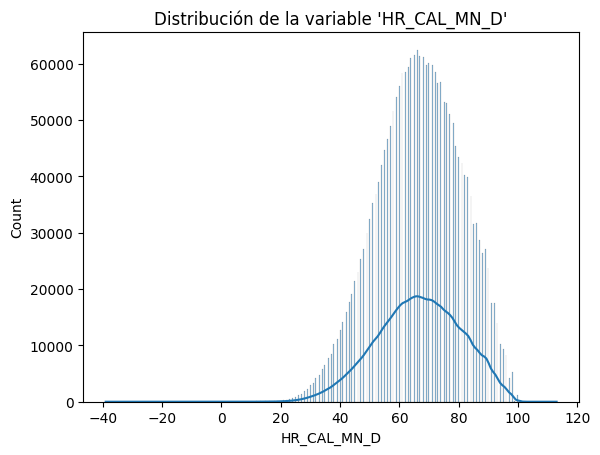

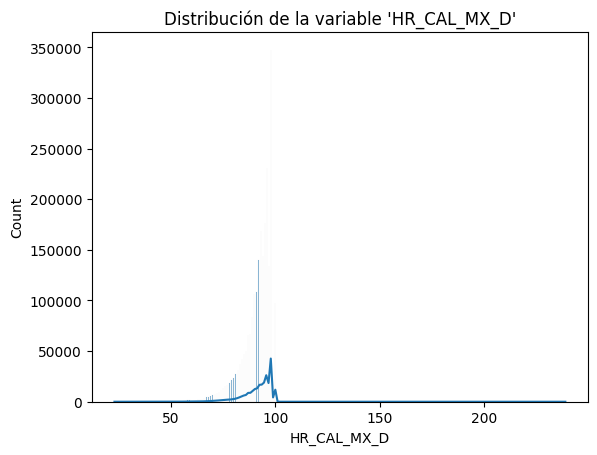

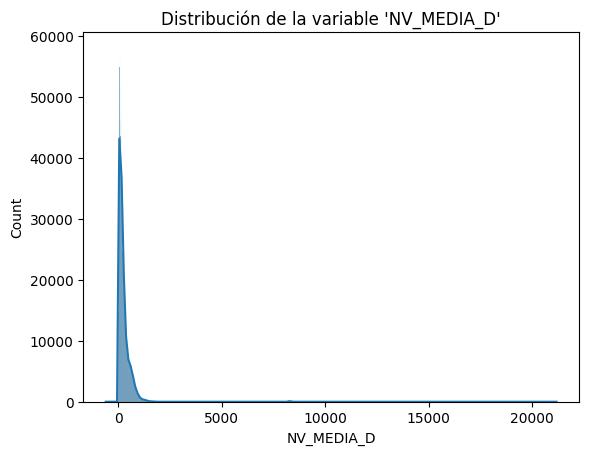

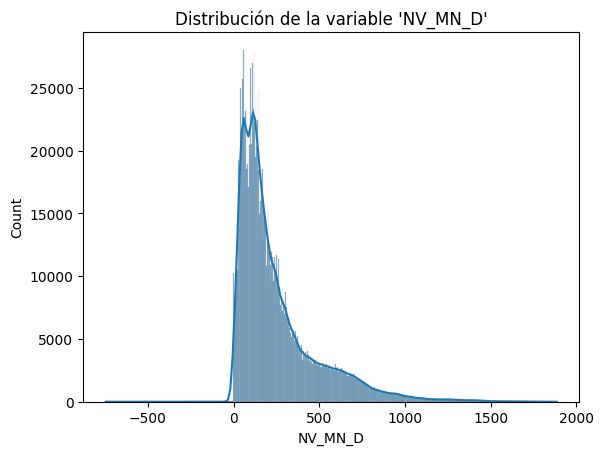

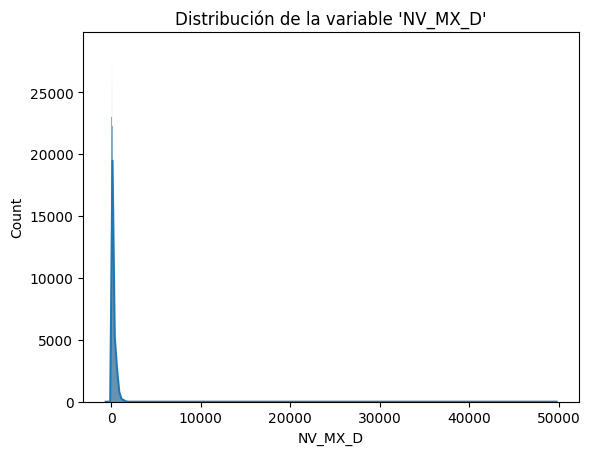

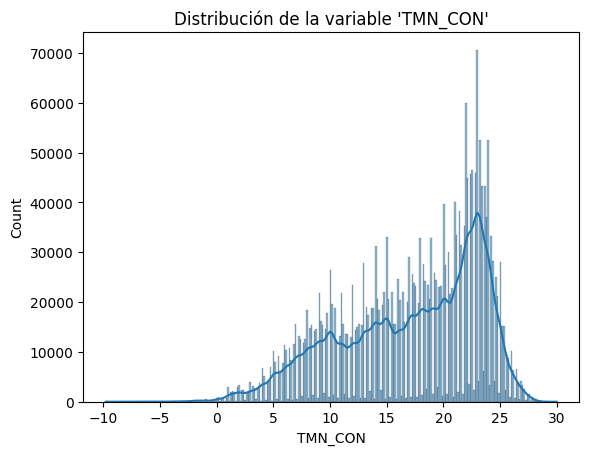

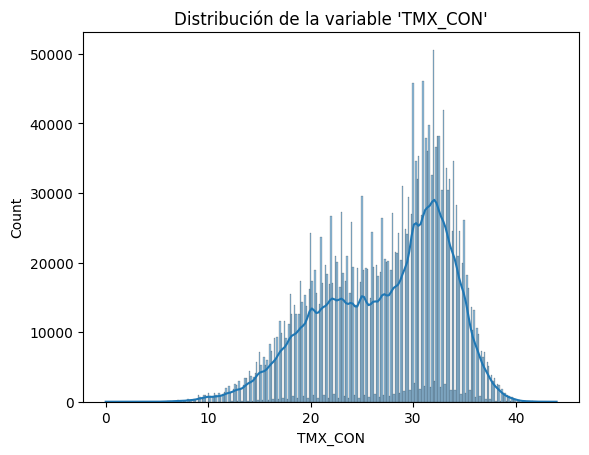

In [6]:
if __name__ == "__main__":
    # Cargar datos
    df = pd.read_csv(f'{DATA_FOLDER}/data.csv')
    resumen_general(df)
    datos_faltante(df)
    distribucion_variable_objetivo(df)
    estadisticas_descriptivas(df)
    distribucion_variables(df)